In [12]:
#lets load the required libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#lets load the data set
data = pd.read_csv("mdata.csv")

In [4]:
data.columns

Index(['Unnamed: 0', 'id', 'female', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'honors'],
      dtype='object')

In [5]:
data.head(5)

,Unnamed: 0,id,female,ses,schtyp,prog,read,write,math,science,honors
0,1,45,female,low,public,vocation,34,35,41,29,not enrolled
1,2,108,male,middle,public,general,34,33,41,36,not enrolled
2,3,15,male,high,public,vocation,39,39,44,26,not enrolled
3,4,67,male,low,public,vocation,37,37,42,33,not enrolled
4,5,153,male,middle,public,vocation,39,31,40,39,not enrolled


In [6]:
data.describe()

,Unnamed: 0,id,read,write,math,science
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,100.500000,52.230000,52.775000,52.645000,51.850000
std,57.879185,57.879185,10.252937,9.478586,9.368448,9.900891
min,1.000000,1.000000,28.000000,31.000000,33.000000,26.000000
25%,50.750000,50.750000,44.000000,45.750000,45.000000,44.000000
50%,100.500000,100.500000,50.000000,54.000000,52.000000,53.000000
75%,150.250000,150.250000,60.000000,60.000000,59.000000,58.000000
max,200.000000,200.000000,76.000000,67.000000,75.000000,74.000000


In [7]:
#lets rename the column
data=data.rename(columns={'Unnamed: 0':'X'})
#lets drop the insignificance variable columns
data=data.drop(['X', 'id'], axis=1)

In [8]:
#target variable
data.prog.value_counts()

academic    105
vocation     50
general      45
Name: prog, dtype: int64

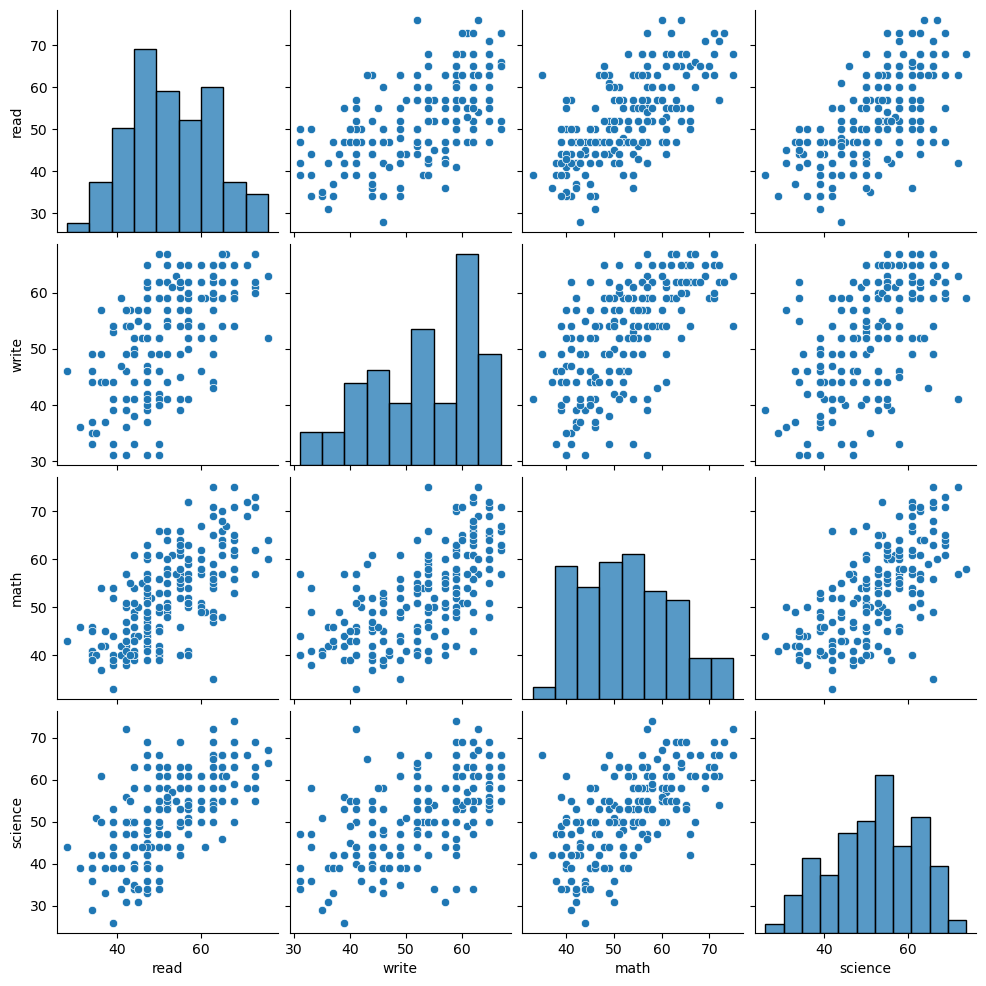

In [9]:
# Scatter plot between each possible pair of independent variable and also histogram for each independent variable 
sns.pairplot(data) # Normal

In [17]:
# Correlation values between each independent features
data.corr()

,read,write,math,science
read,1.000000,0.596776,0.662280,0.630158
write,0.596776,1.000000,0.617449,0.570442
math,0.662280,0.617449,1.000000,0.630733
science,0.630158,0.570442,0.630733,1.000000


In [18]:
#lets split the data into train and test
train, test = train_test_split(data, test_size = 0.2)

In [19]:
# ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers
model = LogisticRegression(multi_class = "multinomial", solver = "newton-cg").fit(train.iloc[:, 4:8], train.iloc[:, 3])

In [20]:
test_predict = model.predict(test.iloc[:, 4:8]) # Test predictions

In [21]:
# Test accuracy 
accuracy_score(test.iloc[:,3], test_predict)

0.5

In [22]:
train_predict = model.predict(train.iloc[:, 4:8]) # Train predictions 

In [23]:
# Train accuracy 
accuracy_score(train.iloc[:,3], train_predict) 

0.6125